# **Friction Stir Welding of AA6082 and predicting the ultimate tensile strength using Ensemble Learning**

# **Installing and Importing**

In [ ]:
!pip install catboost
!pip install xgboost

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , BaggingRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import sklearn.metrics as metrics

# **Reading the data**

In [3]:
train=pd.read_csv("/content/drive/MyDrive/Train.csv") 
test=pd.read_csv("/content/drive/MyDrive/test.csv")

# **Creating Dependent and Independent variables**

In [4]:
X_train=train.iloc[:,0:2]
Y_train=train.iloc[:,2]

X_test=test.iloc[:,0:2]
Y_test=test.iloc[:,2]

Y_test_check=Y_test.to_numpy()

# **Ultimate Tensile Strength vs. Experiment Sample Number of Training data**

Text(0.5, 1.0, 'Ultimate Tensile Strength vs. Experiment Sample Number of Train Data Set ')

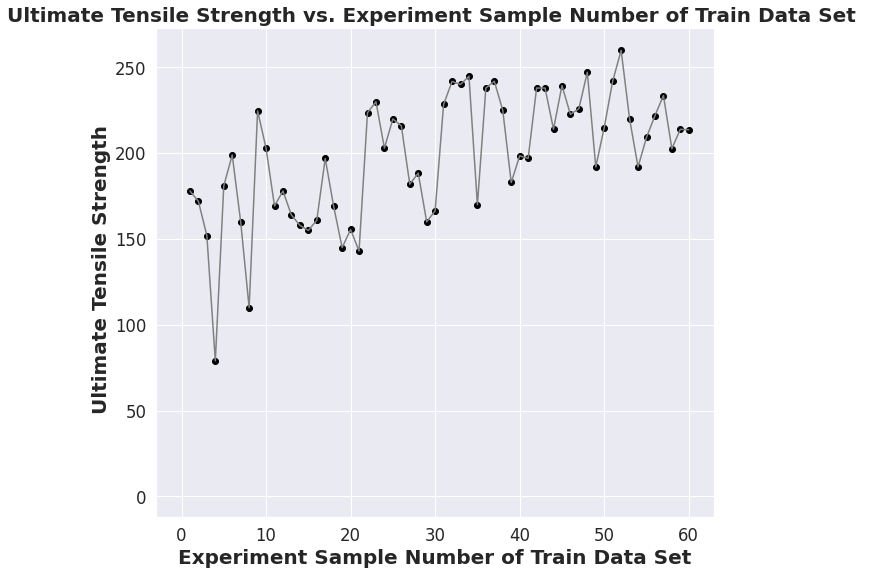

In [33]:
size=train.shape
inputx=[]
inputy=[]
for i in range(1,size[0]+1):
  inputx.append(i)
for i in range(size[0]):
  inputy.append(Y_train[i])

sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize =(10,9))
plt.scatter(inputx,inputy,color="black")
plt.plot(inputx,inputy,0.8,color ='grey')
plt.xlabel(' Experiment Sample Number of Train Data Set ', fontsize=20,fontweight='bold')
plt.ylabel(' Ultimate Tensile Strength', fontsize=20,fontweight='bold')
plt.title ('Ultimate Tensile Strength vs. Experiment Sample Number of Train Data Set ',fontsize=20,fontweight='bold')

# **To store r2_score of different algorithms**

In [15]:
r2_score=[]

# **Decision Tree**

In [16]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

y_predict_br=dt.predict(X_test)

r2=metrics.r2_score(Y_test,y_predict_br)
mse=metrics.mean_squared_error(Y_test,y_predict_br)
rmse = np.sqrt(mse)

print("R2 score associated with Decision Tree Regression is :", r2)

r2_score.append(r2)

R2 score associated with Decision Tree Regression is : 0.79664934913618


# **Bagging Regressor**

In [19]:
BReg=BaggingRegressor(tree.DecisionTreeRegressor())
BReg.fit(X_train,Y_train)

y_predict_br=BReg.predict(X_test)

r2=metrics.r2_score(Y_test,y_predict_br)
mse=metrics.mean_squared_error(Y_test,y_predict_br)
rmse = np.sqrt(mse)

print("R2 score associated with Decision Tree Regression is :", r2)

r2_score.append(r2)

R2 score associated with Decision Tree Regression is : 0.8587822024029967


# **RandomForestRegressor**

In [20]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

y_predict_rf=rf.predict(X_test)

r2=metrics.r2_score(Y_test,y_predict_rf)

print("R2 score associated with Decision Tree Regression is :", r2)

r2_score.append(r2)

R2 score associated with Decision Tree Regression is : 0.8215985082306877


# **Basic GradientBoostingRegressor**

In [21]:
reg = GradientBoostingRegressor()
reg.fit(X_train, Y_train)

y_predict_reg=reg.predict((X_test))

r2=metrics.r2_score(Y_test,y_predict_reg)

print("R2 score associated with Decision Tree Regression is :", r2)

r2_score.append(r2)

R2 score associated with Decision Tree Regression is : 0.8337141980430541


# **Basic XGBRegressor**

In [24]:
xgbr = XGBRegressor()
xgbr.fit(X_train, Y_train)

y_predict_xgbr=xgbr.predict((X_test))

r2=metrics.r2_score(Y_test,y_predict_xgbr)

print("R2 score associated with Decision Tree Regression is :", r2)

r2_score.append(r2)

[13:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score associated with Decision Tree Regression is : 0.8060878597315604


# **Basic CatBoost**

In [26]:
cbrb = CatBoostRegressor()

cbrb.fit(X_train, Y_train)

y_predict_cbrb=cbrb.predict((X_test))
print(y_predict_cbrb)


r2=metrics.r2_score(Y_test,y_predict_cbrb)

r2_score.append(r2)

print("R2 score associated with Decision Tree Regression is :", r2)

Learning rate set to 0.023654
0:	learn: 35.9723999	total: 46ms	remaining: 46s
1:	learn: 35.6578304	total: 46.4ms	remaining: 23.2s
2:	learn: 35.3235695	total: 46.7ms	remaining: 15.5s
3:	learn: 35.0348557	total: 47ms	remaining: 11.7s
4:	learn: 34.7364339	total: 47.4ms	remaining: 9.42s
5:	learn: 34.4315298	total: 47.8ms	remaining: 7.92s
6:	learn: 34.1563472	total: 48.1ms	remaining: 6.83s
7:	learn: 33.8463247	total: 48.5ms	remaining: 6.01s
8:	learn: 33.5724807	total: 48.8ms	remaining: 5.37s
9:	learn: 33.3993654	total: 49ms	remaining: 4.85s
10:	learn: 33.1405005	total: 49.3ms	remaining: 4.43s
11:	learn: 32.8991121	total: 49.7ms	remaining: 4.09s
12:	learn: 32.7032467	total: 49.9ms	remaining: 3.79s
13:	learn: 32.5127302	total: 50.1ms	remaining: 3.53s
14:	learn: 32.2621505	total: 50.5ms	remaining: 3.31s
15:	learn: 32.1020570	total: 50.8ms	remaining: 3.12s
16:	learn: 31.8596840	total: 51.1ms	remaining: 2.96s
17:	learn: 31.7044185	total: 51.4ms	remaining: 2.8s
18:	learn: 31.4973985	total: 51.6ms

# **Plotting R2 Score of default models**



<Figure size 432x288 with 0 Axes>

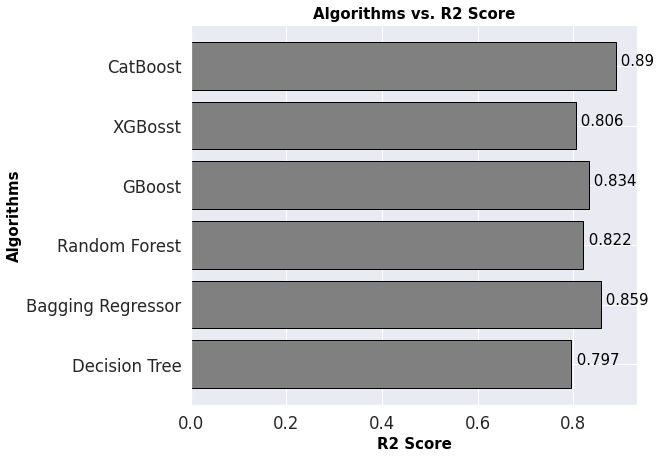

<Figure size 432x288 with 0 Axes>

In [27]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize =(8, 7))

algo=['Decision Tree','Bagging Regressor','Random Forest','GBoost','XGBosst','CatBoost']

plt.barh(algo,r2_score,0.8,color ='grey',edgecolor ='black')
plt.xlabel('R2 Score', fontsize=15,color='black', fontweight='bold')
plt.ylabel('Algorithms', fontsize=15,color='black', fontweight='bold')
plt.title ('Algorithms vs. R2 Score',fontsize=15,color='black', fontweight='bold')

y=[]
x=algo

for i in range(len(r2_score)):
  y.append(round(r2_score[i],3))

for i_x,i_y in zip(y,x):
  plt.text(i_x, i_y,'\n\n {}'.format(i_x),fontsize=15, color='black')

plt.figure()

# **Cat Boost Regressor tunning**
Based on the R2 scores on the Regression algorithms it is evident that CatBoost Regressor is the best model and hyperparameter is done on it to improve the R2 Score

In [28]:
from sklearn.model_selection import GridSearchCV

model_CBR = CatBoostRegressor()
parameters = {'depth'         : [3,4,5,6],
                  'learning_rate' : [0.345566],
                  'iterations'    : [250,350,475],
                  'l2_leaf_reg':[3.2211,4.2211],
                  'bagging_temperature':[4,5]
                 }

grid = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, Y_train)

grid_search_result = model_CBR.grid_search(parameters, 
                                       X=X_train, 
                                       y=Y_train, 
                                       plot=True)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

0:	learn: 33.0456758	total: 120us	remaining: 57.2ms
1:	learn: 30.9898250	total: 873us	remaining: 207ms
2:	learn: 29.7046694	total: 1.16ms	remaining: 183ms
3:	learn: 28.3792206	total: 1.42ms	remaining: 167ms
4:	learn: 27.4623096	total: 1.68ms	remaining: 158ms
5:	learn: 25.4784185	total: 1.95ms	remaining: 152ms
6:	learn: 25.0905891	total: 2.23ms	remaining: 149ms
7:	learn: 24.6708177	total: 2.51ms	remaining: 146ms
8:	learn: 23.1115468	total: 2.76ms	remaining: 143ms
9:	learn: 22.4944019	total: 3.02ms	remaining: 141ms
10:	learn: 21.8740234	total: 3.28ms	remaining: 138ms
11:	learn: 21.1767587	total: 3.74ms	remaining: 144ms
12:	learn: 20.4724647	total: 4.06ms	remaining: 144ms
13:	learn: 19.8801268	total: 4.34ms	remaining: 143ms
14:	learn: 19.5877876	total: 4.63ms	remaining: 142ms
15:	learn: 18.9920838	total: 4.9ms	remaining: 141ms
16:	learn: 18.7663746	total: 5.14ms	remaining: 139ms
17:	learn: 18.2354069	total: 5.41ms	remaining: 137ms
18:	learn: 18.0051860	total: 5.71ms	remaining: 137ms
19:	l

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
101:	learn: 7.7610815	test: 12.3920682	best: 11.5074408 (66)	total: 30ms	remaining: 110ms
102:	learn: 7.7429726	test: 12.4571824	best: 11.5074408 (66)	total: 30.3ms	remaining: 109ms
103:	learn: 7.7100845	test: 12.5392866	best: 11.5074408 (66)	total: 30.6ms	remaining: 109ms
104:	learn: 7.6444499	test: 12.4085520	best: 11.5074408 (66)	total: 30.9ms	remaining: 109ms
105:	learn: 7.5961029	test: 12.5465939	best: 11.5074408 (66)	total: 31.2ms	remaining: 109ms
106:	learn: 7.5643220	test: 12.5294229	best: 11.5074408 (66)	total: 31.5ms	remaining: 108ms
107:	learn: 7.5360472	test: 12.5120877	best: 11.5074408 (66)	total: 31.8ms	remaining: 108ms
108:	learn: 7.5159333	test: 12.4989778	best: 11.5074408 (66)	total: 32.1ms	remaining: 108ms
109:	learn: 7.4946047	test: 12.4928018	best: 11.5074408 (66)	total: 32.4ms	remaining: 107ms
110:	learn: 7.4710044	test: 12.4804256	best: 11.5074408 (66)	total: 32.7ms	remaining: 107ms
111:	learn: 7.4634522	test: 12.

# **Tunned CatBoost Model**
 The best parameters across all searched parameters are selected and implemented to improve the R2 Score

In [29]:
cbr = CatBoostRegressor(task_type="GPU",loss_function='RMSE',iterations=475,learning_rate=0.345566,depth=3,l2_leaf_reg=3.2211,bagging_temperature=4)
cbr.fit(X_train, Y_train,plot=True)

y_predict_cbr=cbr.predict((X_test))
print(y_predict_cbr)

r2=metrics.r2_score(Y_test,y_predict_cbr)

print("\nR2 score associated with Decision Tree Regression is :", r2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 31.9692418	total: 14.3ms	remaining: 6.77s
1:	learn: 28.8980946	total: 21.3ms	remaining: 5.04s
2:	learn: 26.0065096	total: 24.1ms	remaining: 3.79s
3:	learn: 24.1172969	total: 26.4ms	remaining: 3.1s
4:	learn: 22.8177484	total: 28.6ms	remaining: 2.69s
5:	learn: 21.5144664	total: 31.2ms	remaining: 2.44s
6:	learn: 21.1748103	total: 34.1ms	remaining: 2.28s
7:	learn: 20.8909012	total: 36.4ms	remaining: 2.12s
8:	learn: 19.9934511	total: 39.2ms	remaining: 2.03s
9:	learn: 19.2901114	total: 41.6ms	remaining: 1.93s
10:	learn: 18.8333572	total: 43.9ms	remaining: 1.85s
11:	learn: 18.5713039	total: 46.1ms	remaining: 1.78s
12:	learn: 17.7603101	total: 48.5ms	remaining: 1.72s
13:	learn: 17.2354766	total: 50.7ms	remaining: 1.67s
14:	learn: 16.9588686	total: 53ms	remaining: 1.62s
15:	learn: 16.7662002	total: 55.3ms	remaining: 1.58s
16:	learn: 16.6087934	total: 57.7ms	remaining: 1.55s
17:	learn: 16.1912650	total: 59.9ms	remaining: 1.52s
18:	learn: 16.0719563	total: 62.2ms	remaining: 1.49s
19:	le

# **Printing Acutal UTS & Predicted UTS**


In [44]:
yp=[]
yt=[]
for i in range(0,8):
  yp.append(y_predict_cbr[i])
  yt.append(Y_test_check[i])

yp_df=pd.DataFrame(yp,columns = ['Predicted UTS'])
yt_df=pd.DataFrame(yt,columns = ['Actual UTS'])

yp_yt_df=pd.concat([yt_df,yp_df],axis=1)
yp_yt_df

,Actual UTS,Predicted UTS
0,135.00,133.853556
1,192.00,194.459808
2,185.00,202.256890
3,182.00,181.990304
4,193.00,195.345042
5,214.00,213.966204
6,232.86,232.913430
7,217.34,216.314003


# **Ultimate Tensile Strength vs. Experiment Sample Number**

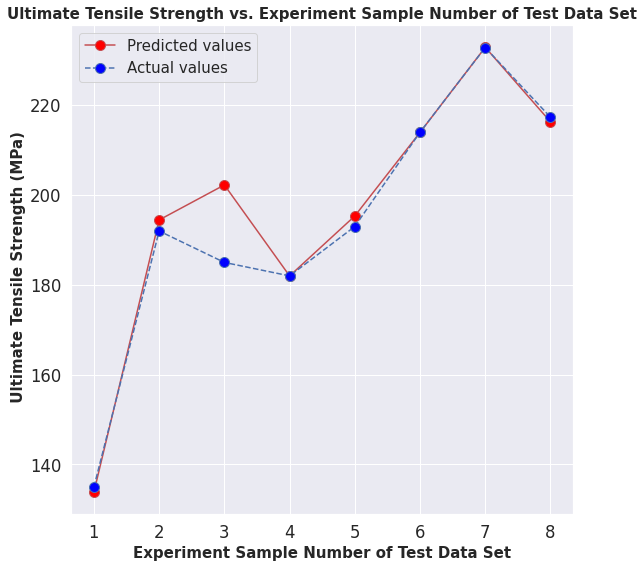

In [45]:
sns.set(font_scale=1.5)

a=[]
for i in range(1,9):
  a.append(i)

plt.figure(figsize=(9,9))

plt.plot(a,yp,"r-",marker='.', markerfacecolor='red', markersize=20,label='Predicted values')
plt.plot(a,yt,"b-",marker='.', markerfacecolor='blue', markersize=20,label='Actual values',linestyle='dashed')

plt.xlabel('Experiment Sample Number of Test Data Set', fontsize=15,fontweight='bold')
plt.ylabel(' Ultimate Tensile Strength (MPa)', fontsize=15,fontweight='bold')
plt.title ('Ultimate Tensile Strength vs. Experiment Sample Number of Test Data Set',fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

# **Plotting CatBoost Regressor Tree**
0 --> Rotational Speed (RPM)

1 --> Welding Speed (mm/min)

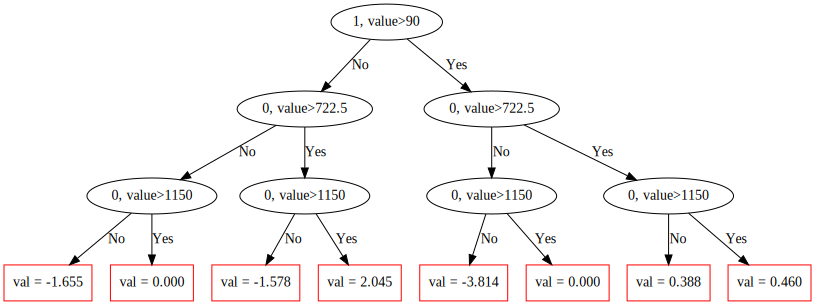

In [ ]:
cbr.plot_tree(tree_idx=0, pool=None)

# **Predicting Values using gradio**

In [34]:
!pip install gradio

     |████████████████████████████████| 1.1MB 9.0MB/s 
     |████████████████████████████████| 215kB 33.5MB/s 
     |████████████████████████████████| 1.9MB 35.5MB/s 
     |████████████████████████████████| 962kB 55.6MB/s 
     |████████████████████████████████| 3.2MB 57.5MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=1025732adb54a3faa5a4baafe1d8adfa9c749bff851eee9dbbe2c2fda844ceff
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=dc362bd38cd1c02155f9d509a5241e817e6247ba9774e402df15e7bd34bd1649
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
Successfully built flask-cachebuster ffmpy


In [36]:
import gradio 

def pre(rs,ws):
  result = np.array([[rs,ws]])
  r=round(float(cbr.predict(result)),2)

  return r 

gradio.Interface(pre, inputs=[gradio.inputs.Slider(500, 4600),gradio.inputs.Slider(20,360)],outputs="text").launch(share=True) 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://23236.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7861/',
 'https://23236.gradio.app')